<a href="https://colab.research.google.com/github/SaharaJP/new-project/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%98%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82_%D0%96%D0%B8%D1%80%D0%BE%D0%B2_%D0%90%D0%BD%D0%B4%D1%80%D0%B5%D0%B9_%D0%92%D0%B8%D1%82%D0%B0%D0%BB%D1%8C%D0%B5%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv('/train_data - Лист1.csv')

In [ ]:
df.head()

,Unnamed: 0,text,label
0,0,"""Как оплатить штрафы через ваш банк?""",1
1,1,Хочу взять автокредит. Какие документы необход...,4
2,2,“Как избежать комиссии при снятии наличных за ...,3
3,3,Хочу оформить ипотеку. Какие условия?,4
4,4,“Увеличится ли кредитный лимит. если я не допу...,2


In [ ]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [ ]:
df['text'].str.isspace().sum()

0

In [ ]:
def get_corpus(phrase):
    corpus = []
    for word in phrase:
        corpus.append(word)
    return corpus

In [ ]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

In [ ]:
def get_wordcloud(corpus):
    wordcloud = WordCloud(
        background_color = 'white',
        width = 1000,
        height = 1500,
        max_words = 100,
        random_state = 42
    ).generate(str_corpus(corpus))
    return wordcloud

In [ ]:
corpus = get_corpus(df['text'].values)
imwordcloud = get_wordcloud(corpus)

<Axes: >

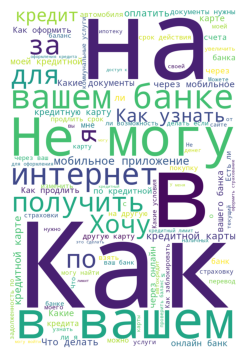

In [ ]:
fig = plt.Figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(imwordcloud)
plt.axis('off')
plt.subplot(1,2,1)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
my_stopword = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['clear_text'] = df['text'].map(lambda x: x.lower())
df['clear_text'] = df['text'].map(lambda x: x if x not in punctuation
                                  and x not in my_stopword
                                  and x != ' '
                                  else '')

In [ ]:
new_df = df.copy()
del new_df['text']

In [ ]:
corpus = get_corpus(new_df['clear_text'].values)
imwordcloud = get_wordcloud(corpus)

<Axes: >

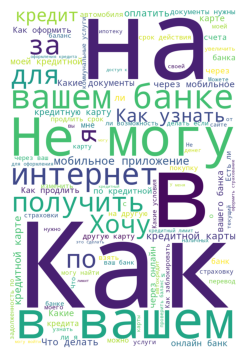

In [ ]:
fig = plt.Figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(imwordcloud)
plt.axis('off')
plt.subplot(1,2,1)

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df['clear_text']
y = new_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier())
])
knn_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn_clf', KNeighborsClassifier(n_neighbors=10))
])

In [ ]:
sgd_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('sgd_clf', SGDClassifier())])

In [ ]:
knn_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=10))])

In [ ]:
pred_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(pred_sgd, y_test))

              precision    recall  f1-score   support

           1       0.50      0.62      0.56         8
           2       0.83      0.91      0.87        11
           3       0.88      1.00      0.93         7
           4       0.67      0.40      0.50        10
           5       0.50      0.50      0.50         4

    accuracy                           0.70        40
   macro avg       0.68      0.69      0.67        40
weighted avg       0.70      0.70      0.69        40



In [ ]:
pred_knn = knn_ppl_clf.predict(X_test)
print(metrics.classification_report(pred_knn, y_test))

              precision    recall  f1-score   support

           1       0.30      0.75      0.43         4
           2       0.75      0.69      0.72        13
           3       0.38      0.75      0.50         4
           4       0.67      0.29      0.40        14
           5       0.50      0.40      0.44         5

    accuracy                           0.53        40
   macro avg       0.52      0.58      0.50        40
weighted avg       0.61      0.53      0.52        40



In [ ]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier())
])

In [ ]:
sgd_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('sgd_clf', SGDClassifier())])

In [ ]:
pred_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(pred_sgd, y_test))

              precision    recall  f1-score   support

           1       0.50      0.71      0.59         7
           2       0.83      0.71      0.77        14
           3       1.00      0.80      0.89        10
           4       0.50      0.60      0.55         5
           5       0.50      0.50      0.50         4

    accuracy                           0.70        40
   macro avg       0.67      0.67      0.66        40
weighted avg       0.74      0.70      0.71        40



In [ ]:
knn_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('knn_clf', KNeighborsClassifier(n_neighbors=5,
                                     leaf_size=30,
                                     metric='minkowski'))
])

In [ ]:
knn_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('knn_clf', KNeighborsClassifier())])

In [ ]:
pred_knn = knn_ppl_clf.predict(X_test)
print(metrics.classification_report(pred_knn, y_test))

              precision    recall  f1-score   support

           1       0.40      0.67      0.50         6
           2       0.75      0.69      0.72        13
           3       0.75      0.86      0.80         7
           4       0.67      0.40      0.50        10
           5       0.50      0.50      0.50         4

    accuracy                           0.62        40
   macro avg       0.61      0.62      0.60        40
weighted avg       0.65      0.62      0.62        40



In [ ]:
test_data = pd.read_csv('/test_data - Лист1.csv')

In [ ]:
prediction = sgd_ppl_clf.predict(test_data['text'])
pred_table = pd.DataFrame(test_data['text'], prediction)
pred_table.to_csv('Задание искусственный интеллект Жиров Андрей Витальевич.csv')

In [ ]:
answer = pd.read_csv('Задание искусственный интеллект Жиров Андрей Витальевич.csv')
answer

,Unnamed: 0,text
0,2,“Можете ли вы помочь мне с оплатой коммунальны...
1,2,“Можете ли вы помочь мне с оплатой коммунальны...
2,3,“Можно ли получить кредит в вашем банке без по...
3,4,“Расскажите что такое рассрочка платежа в ваше...
4,4,“Расскажите что такое рассрочка платежа в ваше...
...,...,...
192,3,“Можно ли получить кредит в вашем банке без по...
193,5,Не могу активировать новую кредитную карту. Чт...
194,3,“Можно ли получить кредит в вашем банке без по...
195,2,“Можете ли вы помочь мне с оплатой коммунальны...
